# สัปดาห์ที่ 4

## wordnet
- hyponym (พร้องรูป)
- synonym (พร้องความหมาย)

In [17]:
## ปัญหา puzzle letter
import nltk
puzzle_letters = nltk.FreqDist('egivrvonl') #ชุดตัวอักษรทั้งหมดที่ใช้สร้างคำ
obligatory = 'r' #ตัวที่ต้องมีในชุด
wordlist = nltk.corpus.words.words()
result_wordlist = [w for w in wordlist if len(w) >= 6 and obligatory in w and nltk.FreqDist(w) <= puzzle_letters]

In [15]:
result_wordlist

['glover',
 'gorlin',
 'govern',
 'grovel',
 'ignore',
 'involver',
 'lienor',
 'linger',
 'longer',
 'lovering',
 'noiler',
 'overling',
 'region',
 'renvoi',
 'revolving',
 'ringle',
 'roving',
 'violer',
 'virole']

In [28]:
## ลองใช้ corpus: name ที่พิมพ์ชื่อได้ ทั้งชายและหญิง
names = nltk.corpus.names
male_names = names.words('male.txt')
female_names = names.words('female.txt')
both = [w for w in male_names if w in female_names]
print(len(both),both)

365 ['Abbey', 'Abbie', 'Abby', 'Addie', 'Adrian', 'Adrien', 'Ajay', 'Alex', 'Alexis', 'Alfie', 'Ali', 'Alix', 'Allie', 'Allyn', 'Andie', 'Andrea', 'Andy', 'Angel', 'Angie', 'Ariel', 'Ashley', 'Aubrey', 'Augustine', 'Austin', 'Averil', 'Barrie', 'Barry', 'Beau', 'Bennie', 'Benny', 'Bernie', 'Bert', 'Bertie', 'Bill', 'Billie', 'Billy', 'Blair', 'Blake', 'Bo', 'Bobbie', 'Bobby', 'Brandy', 'Brett', 'Britt', 'Brook', 'Brooke', 'Brooks', 'Bryn', 'Cal', 'Cam', 'Cammy', 'Carey', 'Carlie', 'Carlin', 'Carmine', 'Carroll', 'Cary', 'Caryl', 'Casey', 'Cass', 'Cat', 'Cecil', 'Chad', 'Chris', 'Chrissy', 'Christian', 'Christie', 'Christy', 'Clair', 'Claire', 'Clare', 'Claude', 'Clem', 'Clemmie', 'Cody', 'Connie', 'Constantine', 'Corey', 'Corrie', 'Cory', 'Courtney', 'Cris', 'Daffy', 'Dale', 'Dallas', 'Dana', 'Dani', 'Daniel', 'Dannie', 'Danny', 'Darby', 'Darcy', 'Darryl', 'Daryl', 'Deane', 'Del', 'Dell', 'Demetris', 'Dennie', 'Denny', 'Devin', 'Devon', 'Dion', 'Dionis', 'Dominique', 'Donnie', 'Donny',

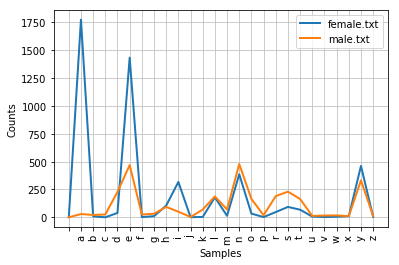

In [33]:
## ลองใช้ corpus: พล็อตกราฟหญิงเทียบชาย
from nltk import ConditionalFreqDist
from nltk.corpus import names
names = nltk.corpus.names
male_names = names.words('male.txt')
female_names = names.words('female.txt')
both = [w for w in male_names if w in female_names]
conFreq = ConditionalFreqDist([(fileid,w[-1]) for fileid in names.fileids() for w in names.words(fileid)])
conFreq.plot()

## วิธีใช้ CMU Dict

In [46]:
#นับคำพร้องรูปบน CMUDICT
from nltk.corpus import cmudict
from nltk import FreqDist
entries = nltk.corpus.cmudict.entries()
freq = FreqDist([w[0] for w in entries])
result_more_than_one = [word for (word,count) in freq.items() if count > 1]

In [50]:
len(result_more_than_one) #จำนวนคำซ้ำ

9241

In [52]:
len(set([w[0] for w in entries])) #จำนวนคำที่ unique

123455

In [63]:
## คำแบบไหนได้หลายแบบมากที่สุด ได้ทั้งหมดกี่แบบ
freq.most_common(1) #Febuary ออกเสียงได้มากสุด

[('february', 5)]

In [71]:
#คำ febuary ออกแบบไหนได้บ้าง
[w for w in entries if w[0] == 'february']

[('february', ['F', 'EH1', 'B', 'Y', 'AH0', 'W', 'EH2', 'R', 'IY0']),
 ('february', ['F', 'EH1', 'B', 'AH0', 'W', 'EH2', 'R', 'IY0']),
 ('february', ['F', 'EH1', 'B', 'R', 'UW0', 'W', 'EH2', 'R', 'IY0']),
 ('february', ['F', 'EH1', 'B', 'UW0', 'W', 'EH2', 'R', 'IY0']),
 ('february', ['F', 'EH1', 'B', 'Y', 'UW0', 'W', 'EH2', 'R', 'IY0'])]

In [74]:
freq.most_common(10)

[('february', 5),
 ("february's", 5),
 ('abkhazian', 4),
 ('activists', 4),
 ('actually', 4),
 ('advantage', 4),
 ('advantaged', 4),
 ('advantages', 4),
 ('analysts', 4),
 ('anointed', 4)]

In [85]:
## โจทย์ อยากได้คำที่ลงท้ายว่า N - IH0 - K - S
entries = nltk.corpus.cmudict.entries()
subfix_nick = [word for word,pron in entries if pron[-4:] == ['N','IH0','K','S'] ]
print(len(subfix_nick))
print(subfix_nick)


83
["atlantic's", 'audiotronics', 'avionics', 'beatniks', 'calisthenics', 'centronics', 'chamonix', 'chetniks', "clinic's", 'clinics', 'conics', 'conics', 'cryogenics', 'cynics', 'diasonics', "dominic's", 'ebonics', 'electronics', "electronics'", "endotronics'", 'endotronics', 'enix', 'environics', 'ethnics', 'eugenics', 'fibronics', 'flextronics', 'harmonics', 'hispanics', 'histrionics', 'identics', 'ionics', 'kibbutzniks', 'lasersonics', 'lumonics', 'mannix', 'mechanics', "mechanics'", 'microelectronics', 'minix', 'minnix', 'mnemonics', 'mnemonics', 'molonicks', 'mullenix', 'mullenix', 'mullinix', 'mulnix', "munich's", 'nucleonics', 'onyx', 'organics', "panic's", 'panics', 'penix', 'pennix', 'personics', 'phenix', "philharmonic's", 'phoenix', 'phonics', 'photronics', 'pinnix', 'plantronics', 'pyrotechnics', 'refuseniks', "resnick's", 'respironics', 'sconnix', 'siliconix', 'skolniks', 'sonics', 'sputniks', 'technics', 'tectonics', 'tektronix', 'telectronics', 'telephonics', 'tonics', 

In [86]:
#รูปแบบการ stress คำ
def stress(pron):
    return [char for phone in pron for char in phone if char.isdigit()]

## วิธีใช้ WordNet
- มีคำทั้งสิ้น 155,287คำ และ 117,659 synonym set
- กลุ่มคำที่มีความหมายเหมือนกันเรียก symset (synnonym set)
- เป็น synonym กันสามารถสลับคำกันได้เลย

In [88]:
from nltk.corpus import wordnet as wn

In [91]:
wn.synsets('motorcar')
#ผลลัทธ์ [Synset('car.n.01')] << car คือ lemma (คำ) n คือคำนาม 01 คือความหมายที่ 1

[Synset('car.n.01')]

In [97]:
#อยากรู้ว่า symset นี้มีคำว่าอะไรอบ้าง
wn.synset('car.n.01').lemma_names()

['car', 'auto', 'automobile', 'machine', 'motorcar']

In [98]:
#อยากรู้ความหมาย
wn.synset('car.n.01').definition()

'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [99]:
#อยากได้ตัวอย่าง?
wn.synset('car.n.01').examples()

['he needs a car to get to work']

In [100]:
#ปริ้นคำศัพท์ที่สนใจ
wn.lemma('car.n.01.automobile')

Lemma('car.n.01.automobile')

In [101]:
#ดึง synset จาก lemma
wn.lemma('car.n.01.automobile').synset()

Synset('car.n.01')

In [102]:
#ดึงชื่อ lemma
wn.lemma('car.n.01.automobile').name()

'automobile'

In [104]:
#ดึง lemma ทั้งหมดของ car
wn.lemmas('car')

[Lemma('car.n.01.car'),
 Lemma('car.n.02.car'),
 Lemma('car.n.03.car'),
 Lemma('car.n.04.car'),
 Lemma('cable_car.n.01.car')]

# Wordnet Hierachy
- เก็บข้อมูลเป็น hierachy
- ลำดับชั้นเรียก hyponyms
- ตัวบนสุดเรียก unique beginner

In [110]:
motorcar = wn.synset('car.n.01')
# ลงไป 1 ชั้น
print(motorcar.hyponyms())
# ขึ้นไป 1 ชั้น
print(motorcar.hypernyms())

[Synset('ambulance.n.01'), Synset('beach_wagon.n.01'), Synset('bus.n.04'), Synset('cab.n.03'), Synset('compact.n.03'), Synset('convertible.n.01'), Synset('coupe.n.01'), Synset('cruiser.n.01'), Synset('electric.n.01'), Synset('gas_guzzler.n.01'), Synset('hardtop.n.01'), Synset('hatchback.n.01'), Synset('horseless_carriage.n.01'), Synset('hot_rod.n.01'), Synset('jeep.n.01'), Synset('limousine.n.01'), Synset('loaner.n.02'), Synset('minicar.n.01'), Synset('minivan.n.01'), Synset('model_t.n.01'), Synset('pace_car.n.01'), Synset('racer.n.02'), Synset('roadster.n.01'), Synset('sedan.n.01'), Synset('sport_utility.n.01'), Synset('sports_car.n.01'), Synset('stanley_steamer.n.01'), Synset('stock_car.n.01'), Synset('subcompact.n.01'), Synset('touring_car.n.01'), Synset('used-car.n.01')]
[Synset('motor_vehicle.n.01')]


### คำสั่งน่ารู้
- meronyms แสดงการเป็นส่วนประกอบ เช่น ต้นไม้ เป็นส่วนประกอบของป่า
- holonyms แสดงการไปอยู่ข้างใน
- entails แสดงความเกี่ยวข้อกริยา เช่น กิน - เขี้ยว - กลืน
- antonyms คำตรงข้าม

In [111]:
wn.synset('tree.n.01').part_meronyms()

[Synset('burl.n.02'),
 Synset('crown.n.07'),
 Synset('limb.n.02'),
 Synset('stump.n.01'),
 Synset('trunk.n.01')]

In [112]:
wn.synset('tree.n.01').substance_meronyms()

[Synset('heartwood.n.01'), Synset('sapwood.n.01')]

In [113]:
wn.synset('tree.n.01').member_holonyms()

[Synset('forest.n.01')]

In [114]:
wn.synset('walk.v.01').entailments()

[Synset('step.v.01')]

In [117]:
#อยากรู้คำสั่งที่มี
dir(wn.synset('walk.v.01'))

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_all_hypernyms',
 '_definition',
 '_examples',
 '_frame_ids',
 '_hypernyms',
 '_instance_hypernyms',
 '_iter_hypernym_lists',
 '_lemma_names',
 '_lemma_pointers',
 '_lemmas',
 '_lexname',
 '_max_depth',
 '_min_depth',
 '_name',
 '_needs_root',
 '_offset',
 '_pointers',
 '_pos',
 '_related',
 '_shortest_hypernym_paths',
 '_wordnet_corpus_reader',
 'also_sees',
 'attributes',
 'causes',
 'closure',
 'common_hypernyms',
 'definition',
 'entailments',
 'examples',
 'frame_ids',
 'hypernym_distances',
 'hypernym_paths',
 'hypernyms',
 'hyponyms',
 'instance_hypernyms',
 'instance_hyponyms',
 'jcn

In [118]:
#อยากดูความสัมพันธ์ของแม่ตัวที่กล่ำที่สุด
right = wn.synset('right_whale.n.01')
orca = wn.synset('orca.n.01')
right.lowest_common_hypernyms(orca)

[Synset('whale.n.02')]

In [120]:
tortoise = wn.synset('tortoise.n.01')
right.lowest_common_hypernyms(tortoise)

[Synset('vertebrate.n.01')]

In [123]:
#ดูระดับความลึก
wn.synset('orca.n.01').min_depth()

16

In [125]:
#ยิ่งค่ามากยิ่งดี แปลว่าคำใกล้กัน สูตรคือ 1/(1+distance)
print(wn.path_similarity(right,orca))
print(wn.path_similarity(orca,tortoise)) 

0.16666666666666666
0.07142857142857142
